In [135]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# load data & Split

In [136]:
# Load feature and target data
features = pd.read_csv(r"D:\JN\data set\created dataset\PCG\new PCG extracted feature\new_PCG(128)(float)_all_channel.csv", header=None, skiprows=[0])  # Adjust header based on your CSV format
targets = pd.read_csv(r'D:\JN\data set\data from web\Reference_aug.csv', header=None)

In [137]:
print(features.shape)
features.info()
targets.shape

(1975, 128)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 1.9 MB


(1975, 2)

In [138]:
features.head

<bound method NDFrame.head of            0         1         2         3         4    5         6    \
0     0.294811  0.022825  0.212150  0.155776  0.041703  0.0  0.280764   
1     0.385458  0.071955  0.219883  0.192276  0.055445  0.0  0.320161   
2     0.317197  0.075981  0.241319  0.155160  0.000000  0.0  0.274218   
3     0.342269  0.053110  0.246039  0.185384  0.063225  0.0  0.285128   
4     0.283734  0.086297  0.181334  0.243141  0.051346  0.0  0.383563   
...        ...       ...       ...       ...       ...  ...       ...   
1970  0.290347  0.121043  0.209645  0.268966  0.023524  0.0  0.411470   
1971  0.300391  0.123680  0.172751  0.225043  0.026390  0.0  0.397833   
1972  0.287346  0.042525  0.260614  0.218471  0.000000  0.0  0.409685   
1973  0.372039  0.037899  0.272289  0.280999  0.032084  0.0  0.459461   
1974  0.405822  0.110567  0.201363  0.223876  0.016090  0.0  0.468234   

           7         8    9    ...       118       119       120       121  \
0     0.161255 

In [139]:
# Extract target column
y = targets.iloc[:, -1]  # Selecting the last column
X = features  # All feature columns

In [140]:
# Split data into training and testing sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# visualize data

Shape of Xtrain: (1580, 128)
Mean of features: 0      0.307898
1      0.071790
2      0.198614
3      0.202209
4      0.044535
         ...   
123    0.286089
124    0.139757
125    0.266351
126    0.413622
127    0.096598
Length: 128, dtype: float64
Std of features: 0      0.087619
1      0.048757
2      0.060661
3      0.062892
4      0.031378
         ...   
123    0.080005
124    0.042801
125    0.074770
126    0.108672
127    0.046831
Length: 128, dtype: float64


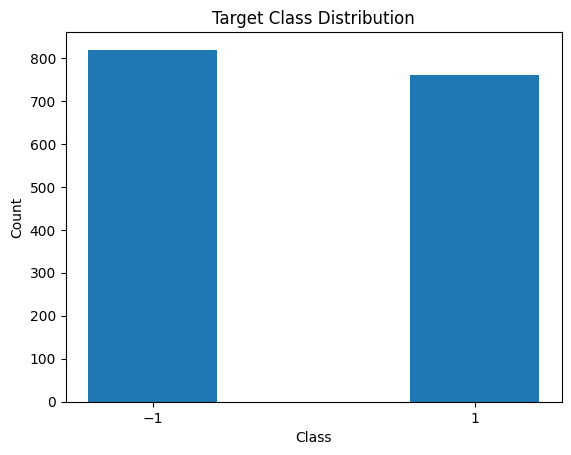

In [141]:
#import numpy as np
import matplotlib.pyplot as plt

# Summary stats
print("Shape of Xtrain:", Xtrain.shape)
print("Mean of features:", np.mean(Xtrain, axis=0))
print("Std of features:", np.std(Xtrain, axis=0))

# Plot target distribution
unique, counts = np.unique(Ytrain, return_counts=True)
plt.bar(unique, counts)
plt.title('Target Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(unique)
plt.show()

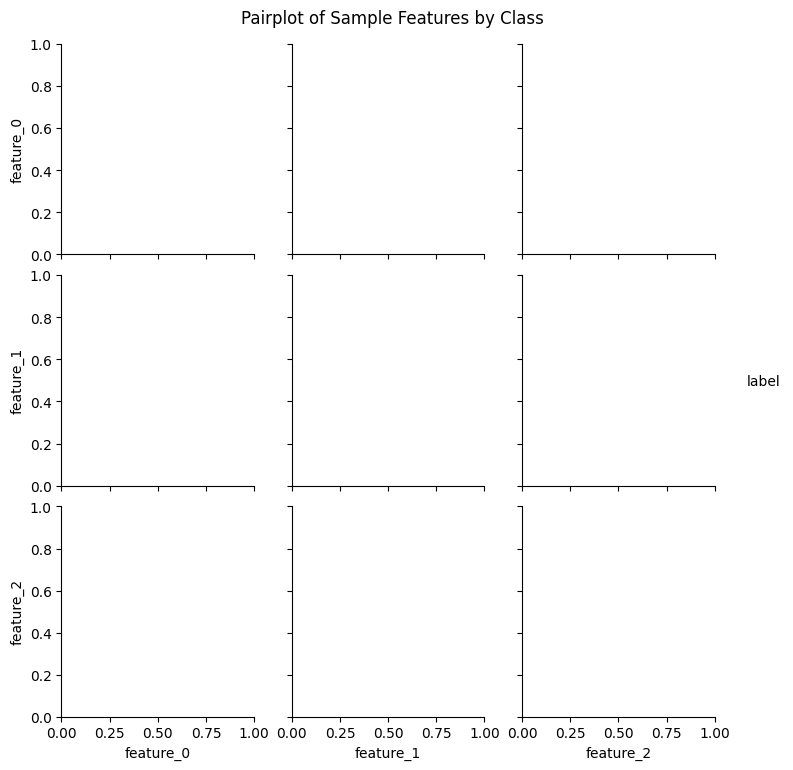

In [144]:
import seaborn as sns
#import pandas as pd
#import matplotlib.pyplot as plt

# Convert Xtrain to DataFrame (assume 64 features)
df = pd.DataFrame(Xtrain, columns=[f'feature_{i}' for i in range(Xtrain.shape[1])])

# Add label column from NumPy array
df['label'] = Ytrain  # no .iloc needed

# Plot a few features colored by label
sample_features = df.columns[:3]  # Choose first 3 features
sns.pairplot(df, vars=sample_features, hue='label', palette='Set1')
plt.suptitle('Pairplot of Sample Features by Class', y=1.02)
plt.show()

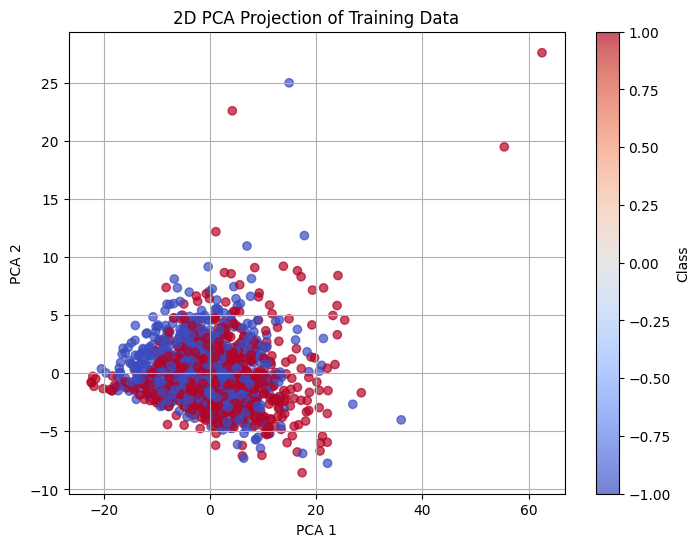

In [145]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xtrain)

# PCA to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot (fix: no .iloc — Ytrain is a NumPy array)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Ytrain, cmap='coolwarm', alpha=0.7)
plt.title('2D PCA Projection of Training Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

# Preprocessing

In [146]:
# normalize
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [148]:
# Reshape for Conv1D: (samples, time steps, features) — we'll assume 128 time steps, 1 feature each
Xtrain = Xtrain.reshape((Xtrain.shape[0], Xtrain.shape[1], 1))
Xtest = Xtest.reshape((Xtest.shape[0], Xtest.shape[1], 1))

In [149]:
# Convert labels to binary class format (if not already 0 or 1)
Ytrain = to_categorical(Ytrain)
Ytest = to_categorical(Ytest)

# CNN model

In [150]:
model = Sequential([
    Conv1D(filters=8, kernel_size=2, activation='relu', input_shape=(128, 1)),
    #MaxPooling1D(pool_size=2),

    Conv1D(filters=8, kernel_size=2, activation='relu'),
    #MaxPooling1D(pool_size=2),

    Conv1D(filters=8, kernel_size=2, activation='relu'),
   #MaxPooling1D(pool_size=2),

    Conv1D(filters=8, kernel_size=2, activation='relu'),
    #MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(8, activation='relu'),
    #Dropout(0.5),
    Dense(2, activation='softmax')  # 2 output classes for binary classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\sanji\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [151]:
history = model.fit(Xtrain, Ytrain, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5558 - loss: 0.6733 - val_accuracy: 1.0000 - val_loss: 0.4367
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.3587 - val_accuracy: 1.0000 - val_loss: 0.1460
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0995 - val_accuracy: 1.0000 - val_loss: 0.0230
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0151 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0012


In [152]:
loss, accuracy = model.evaluate(Xtest, Ytest)
print(f"Test Accuracy: {accuracy:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0012
Test Accuracy: 1.0000


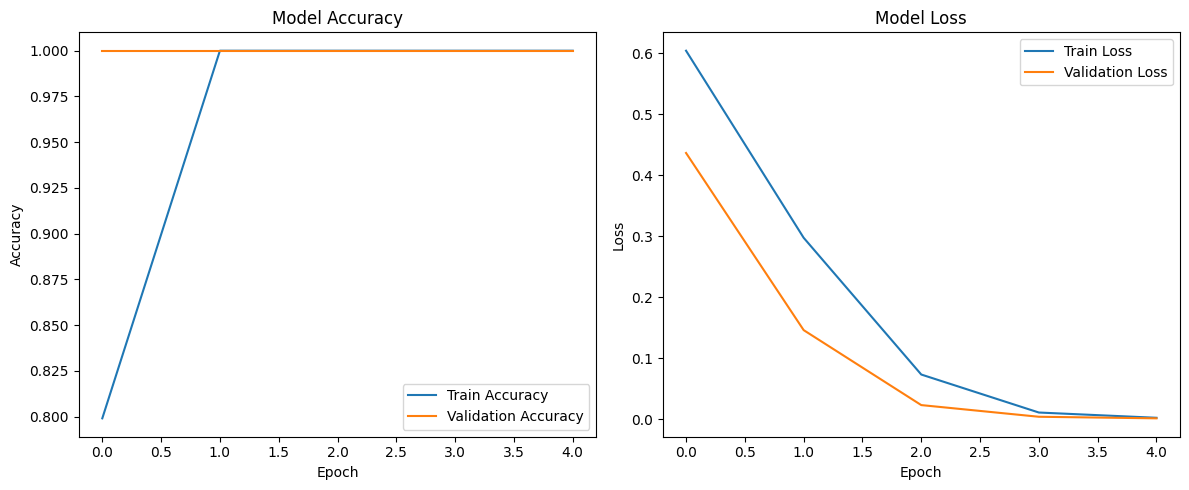

In [153]:
# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()